<a href="https://colab.research.google.com/github/leehon94/Automated-Product-Identification_PJS/blob/master/Keras%20Modelle/MobileNet_5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from keras import optimizers
from keras import layers
from keras import models
from keras.preprocessing import image
from keras import backend as K

from keras import initializers


import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator


base_dir = r'/content/gdrive/My Drive/MVP Datensatz/'
train_dir = r'/content/gdrive/My Drive/MVP Datensatz/Trainingsdatensatz5'


In [0]:


#Beispiel für mögliche Data Augmentations


In [86]:
img_width = 224
img_height = 224

from keras.applications import MobileNet
base_model = MobileNet(weights='imagenet',
  include_top=False,
    input_shape=(img_width,img_height,3)) # input_shape = 299x299x3 by default

#datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)
batch_size = 10

train_datagen = ImageDataGenerator(featurewise_center=False,
                          samplewise_center=False,
                          featurewise_std_normalization=False,
                          samplewise_std_normalization=False,
                          zca_whitening=False,
                          zca_epsilon=1e-06,
                          rotation_range=3,
                          width_shift_range=[-1, 0, +1],
                          height_shift_range=[-1, 0, +1],
                          brightness_range=None, 
                          shear_range=0.1, 
                          zoom_range=0.2,
                          channel_shift_range=0.0, 
                          fill_mode='nearest', 
                          cval=0.0,
                          horizontal_flip=False, 
                          vertical_flip=False, 
                          rescale=1./255, 
                          preprocessing_function=None, 
                          data_format='channels_last', 
                          validation_split=0.2, 
                          interpolation_order=1, 
                          dtype='float32')

rain_datagen = ImageDataGenerator(featurewise_center = False,
                          samplewise_center = False,
                          featurewise_std_normalization = False,
                          samplewise_std_normalization = False,
                          rotation_range = 359,
                          width_shift_range = 30.0,
                          height_shift_range = 0.0,
                          brightness_range = None,
                          channel_shift_range = 50.0,
                          horizontal_flip = True, 
                          vertical_flip = True, 
                          rescale = 1./255,
                          validation_split = 0.2, 
                          interpolation_order = 1, 
                          dtype = 'float32'
                          )

valid_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    validation_split=0.2)

train_generator = rain_datagen.flow_from_directory(
    train_dir, 
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

valid_generator = valid_datagen.flow_from_directory(
    train_dir, 
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')


                      

Found 113 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


In [5]:
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [0]:
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu', kernel_initializer=initializers.RandomNormal(stddev=0.01),
    bias_initializer=initializers.Zeros()))
model.add(layers.Dense(5, activation='sigmoid', kernel_initializer=initializers.RandomNormal(stddev=0.01),
    bias_initializer=initializers.Zeros()))

#freeze all the layers
for layer in base_model.layers:
    layer.trainable = False



In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 7, 7, 1024)        3228864   
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50176)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               12845312  
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1285      
Total params: 16,075,461
Trainable params: 12,846,597
Non-trainable params: 3,228,864
_________________________________________________________________


In [0]:
opt = optimizers.RMSprop()


In [87]:
# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])

history = model.fit_generator(train_generator,
  epochs=20,
  validation_data = valid_generator)


Epoch 1/20
12/12 [==============================] - 12s 1s/step - loss: 4.8681 - acc: 0.3363 - val_loss: 1.0783 - val_acc: 0.5200
Epoch 2/20
12/12 [==============================] - 10s 794ms/step - loss: 1.6119 - acc: 0.3009 - val_loss: 1.1207 - val_acc: 0.5600
Epoch 3/20
12/12 [==============================] - 10s 827ms/step - loss: 1.6040 - acc: 0.3805 - val_loss: 1.1083 - val_acc: 0.6400
Epoch 4/20
12/12 [==============================] - 10s 843ms/step - loss: 1.7606 - acc: 0.4248 - val_loss: 1.0800 - val_acc: 0.5600
Epoch 5/20
12/12 [==============================] - 14s 1s/step - loss: 1.3052 - acc: 0.3628 - val_loss: 0.9362 - val_acc: 0.5600
Epoch 6/20
12/12 [==============================] - 10s 850ms/step - loss: 1.3575 - acc: 0.4425 - val_loss: 0.7307 - val_acc: 0.6400
Epoch 7/20
12/12 [==============================] - 10s 834ms/step - loss: 2.0493 - acc: 0.3982 - val_loss: 1.2923 - val_acc: 0.6000
Epoch 8/20
12/12 [==============================] - 10s 839ms/step - loss: 

In [0]:
model.save("/content/gdrive/My Drive/Keras Models/MobileNet_5-1.h5")

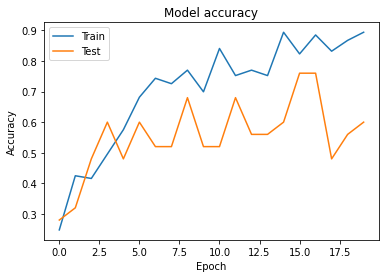

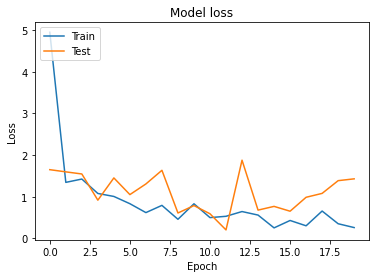

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [88]:
folder_path = base_dir + 'Testbilder'
images = []
for img in os.listdir(folder_path):
    img = os.path.join(folder_path, img)
    img = image.load_img(img, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)

# stack up images list to pass for prediction
images = np.vstack(images)
classes = model.predict_classes(images, batch_size=10)
print(classes)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [92]:
testbild_path = base_dir + 'Testbilder/P1040706.JPG'
testbild = image.load_img(testbild_path, target_size=(img_width,img_height))
testbild = image.img_to_array(testbild)
testbild = np.expand_dims(testbild, axis=0)
predictions = model.predict(testbild)
predictions = predictions.flatten()

predictions

array([1.3510809e-08, 4.2603938e-06, 9.9987173e-01, 1.0000000e+00,
       1.0000000e+00], dtype=float32)

In [0]:
import json
def Vorhersage(Artikelfoto, Speicherort_KI_Modell, Name_KI_Modell):

    model = models.load_model(Speicherort_KI_Modell + Name_KI_Modell)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])
    Artikelfoto = image.load_img(Artikelfoto, target_size=(img_width, img_height))
    Artikelfoto = image.img_to_array(Artikelfoto)
    Artikelfoto = np.expand_dims(Artikelfoto, axis=0)
    prediction = model.predict(Artikelfoto)
    prediction = prediction.flatten()
    artikelnummer = 'Art' + str(np.argmax(prediction)+1)
    wahrscheinlichkeit = str(prediction[np.argmax(prediction)])

    response = json.dumps({"Artikelnummer":artikelnummer, "Wahrscheinlichkeit":wahrscheinlichkeit})

    return response   



In [90]:
predictions[np.argmax(predictions)]

IndexError: ignored

In [89]:
Vorhersage(base_dir + 'Testbilder/P1040706.JPG', '/content/gdrive/My Drive/Keras Models', '/MobileNet5-1.h5')



'{"Artikelnummer": "Art4", "Wahrscheinlichkeit": "0.43251538"}'

In [0]:
# image folder
folder_path = base_dir + 'Testbilder/'
# path to model
model_path = '/path/to/saved/model.h5'
# dimensions of images
img_width, img_height = 299, 299


# load all images into a list
images = []
for img in os.listdir(folder_path):
    img = os.path.join(folder_path, img)
    img = image.load_img(img, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)

# stack up images list to pass for prediction
images = np.vstack(images)
classes = model.predict_classes(images, batch_size=20)
print(classes)

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


In [0]:
predict = model.predict_proba(testbild)
np.argmax(predict)


TypeError: ignored

In [0]:
model.save("/content/gdrive/My Drive/Keras Models/Xception_5-2.h5")

